# EDA

In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

seed = 42

In [2]:
#read in data
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'unicode_escape')

In [3]:
#reviewing import
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [4]:
df.shape

(9093, 3)

In [5]:
df.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [6]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


Noting that there are 9092 tweets in the dataset, but only 9065 are 'unique'. This means there are some duplicate tweets in the dataset that may need to be dropped. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


There are quite a few nulls in the product/brand the emotion is directed to.

## Emotions 
Target variable exploration

In [8]:
emotions = df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts(normalize=True)
emotions

No emotion toward brand or product    0.592654
Positive emotion                      0.327505
Negative emotion                      0.062686
I can't tell                          0.017156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: float64

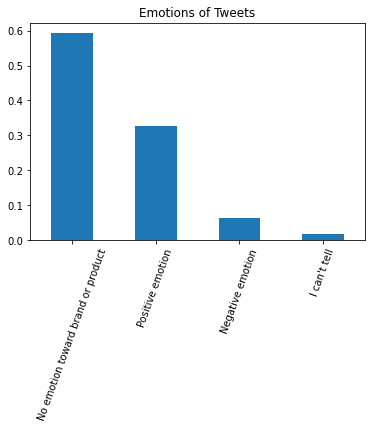

In [9]:
emotions.plot(kind='bar')
plt.title('Emotions of Tweets')
plt.xticks(rotation = 70);

There is imbalance in the emotion target varaiable. Most of the tweets approximately 59% are labeled "No emotion...", followed by "positive" (33%), "negative" (~6%), and finally "I can't tell". 

In [10]:
positive_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion']

positive_emotions['tweet_text'].sample(10)

8210    Can't wait anymore!!! :)) &quot;Google to Laun...
8840    Apple know their target audience. Pop-up shop ...
2139    80s band at google/ACLU 1986 party rocks  #SXS...
4167    Apple selling iPad 2 at #sxsw. California is g...
6256    RT @mention Line is wrapping around the block ...
5707    RT @mention Excited to know more about Google ...
4305    Yay! RT @mention Apple is opening up a temp st...
1596    @mention @mention I'm reading your book on my ...
2767    Hey People! Down here at #sxsw and we are abou...
8392    Photo booth action at the @mention and Google ...
Name: tweet_text, dtype: object

In [11]:
negative_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion']

negative_emotions['tweet_text'].sample(10)

2414    True,expect more insidious approaches, like Ap...
6063    RT @mention I think #Google lost their way by ...
2038    A major #Apple iOS update the day before #SXSW...
3331    @mention Google Circles will be Lame. #sxsw &lt;3
4140    Barry Diller says that you're silly if you wri...
904     compiling my #sxsw list in one google doc is t...
5660    RT @mention Deleting the #sxsw iPhone app!  {l...
5813    RT @mention Google Circles will be toast if it...
2300    Should I buy an iPad for @mention at the makes...
7091    Apple is opening a temporary store in Austin f...
Name: tweet_text, dtype: object

In [12]:
unsure_emotions = df.loc[df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'I can\'t tell']
unsure_emotions['tweet_text'].sample(10)

4375    Do the Humpty hump!  Google ACLU Party like it...
7481    Google Maps car just drove by. Might leave a d...
6732    OH @mention the Apple Pop-Up Store: &quot;Oh.....
1961    At the Team Android party. Can't find it on Go...
2732    Looks like the line for the Apple pop-up store...
4899    At home today. @mention at #sxsw: &quot;apple ...
1087    ipad is a slow resting heartrate  #tapworthy #...
8525    &quot;multiple approaches to monetization&quot...
3939    I would give my Apple stock to be more like @m...
8702    In case our rabbits forgot theirs at home! App...
Name: tweet_text, dtype: object

## DataFrame Formatting
The data frame is very wordy. Updading the column names and 'emotion' labels. 

In [13]:
#renaming columns
df.columns = ['tweet', 'product', 'emotion']
df.columns

Index(['tweet', 'product', 'emotion'], dtype='object')

In [14]:
#changing the emotion lables so it isn't so wordy

new_emotions = ['None', 'Positive', 'Negative', 'Unsure']

new_emotions_dict = dict(zip(emotions.index, new_emotions))
new_emotions_dict

{'No emotion toward brand or product': 'None',
 'Positive emotion': 'Positive',
 'Negative emotion': 'Negative',
 "I can't tell": 'Unsure'}

In [15]:
#renaming the emotion language
df['emotion'] = df['emotion'].replace(new_emotions_dict)

## Brand/Product Exploration
Exploring 'product' column which was originally the  'emotion_in_tweet_is_directed_at' column. Questions to explore:
* What items were reviewed?
* Is there a relationship between items and rating? 

In [16]:
df['product'].isna().sum()

5802

There are 5,802 nulls in this columns. Most tweets do not have an product or brand that they are postively or negatively reacting to.

In [17]:
df['product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: product, dtype: int64

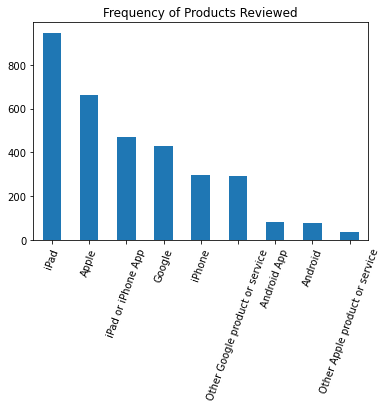

In [18]:
df['product'].value_counts().plot(kind='bar')
plt.title('Frequency of Products Reviewed')
plt.xticks(rotation = 70);

Of the items that the emotion was direct towards, most were iPads. The top three times with emotions are all related to Apple (iPad, Apple, iPad or iPhone App). 

In [19]:
df['product'].fillna('NA', inplace=True)

By adding a label in 'NA' we can compare the emotion repsonese with those that are labeled. 

In [20]:
df['product'].value_counts()

NA                                 5802
iPad                                946
Apple                               661
iPad or iPhone App                  470
Google                              430
iPhone                              297
Other Google product or service     293
Android App                          81
Android                              78
Other Apple product or service       35
Name: product, dtype: int64

In [21]:
product_list = df['product'].value_counts().index
len(product_list)

10

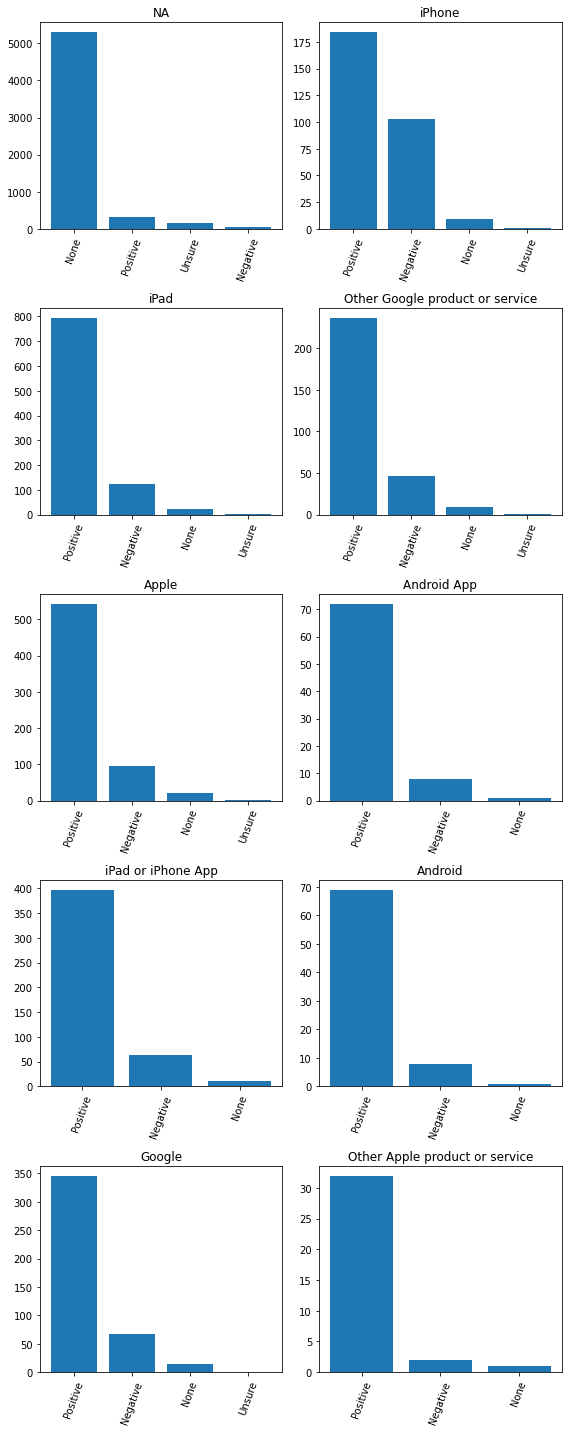

In [22]:
fig, ax = plt.subplots(nrows=(len(product_list)//2), ncols=2, figsize=(8,20))

for n, item in enumerate(product_list):
    
    #establish column and row numbers
    if n<(len(product_list)//2): 
        c = 0
    else: 
        c = 1
    
    if c == 1:
        n = n - 5
    
    #product emotions
    item_df = df.loc[df['product']== item]
    item_emotion = item_df['emotion'].value_counts()
    
    
    #plot graphs
    ax[n,c].bar(item_emotion.index, item_emotion)
    ax[n,c].set_title(item)
    ax[n,c].tick_params(axis='x', labelrotation=70)

plt.tight_layout();

If an emotion was directed towards a brand or product most of the time it was a positive emotion. When tweets were not directed towards a product or a brand, then then tweets were also not associated with a particular emotion. 

**Compare tweets by brand/product**
Graph the emotions by percentage and use the same y-axis for all graphs. 

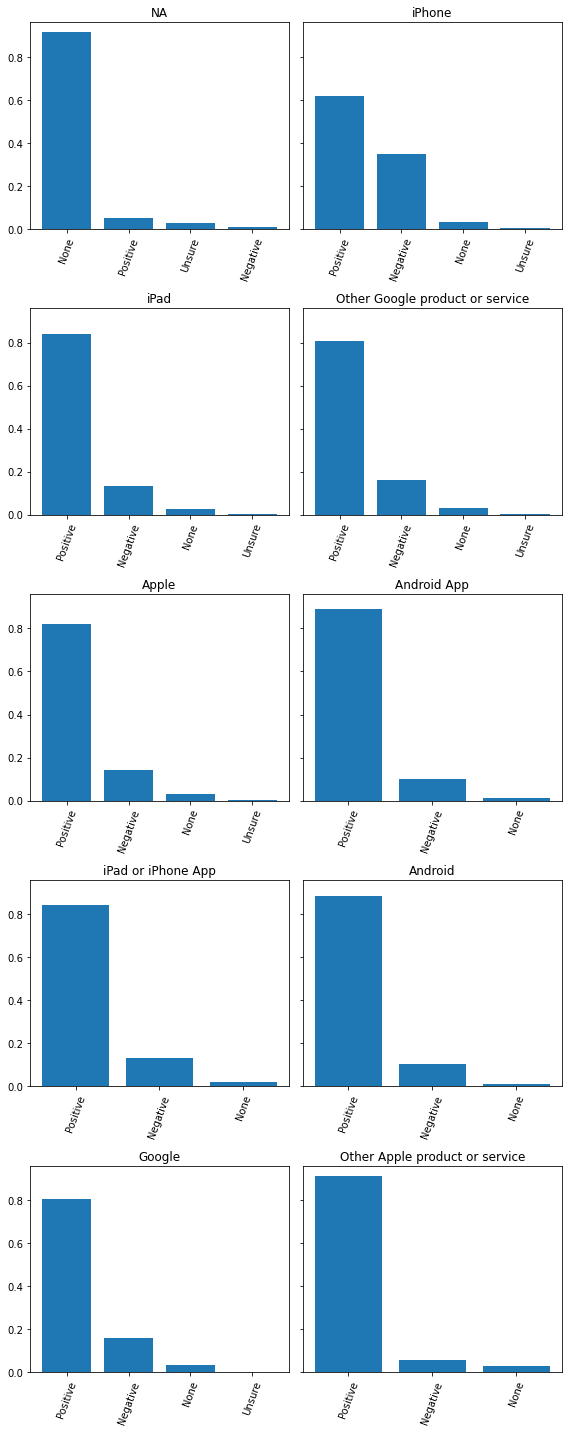

In [23]:
fig, ax = plt.subplots(nrows=(len(product_list)//2), ncols=2, sharey=True, figsize=(8,20))

for n, item in enumerate(product_list):
    
    #establish column and row numbers
    if n<(len(product_list)//2): 
        c = 0
    else: 
        c = 1
    
    if c == 1:
        n = n - 5
    
    #item product ratings
    item_df = df.loc[df['product']== item]
    item_emotion = item_df['emotion'].value_counts(normalize=True)
    
    
    #plot graphs
    ax[n,c].bar(item_emotion.index, item_emotion)
    ax[n,c].set_title(item)
    ax[n,c].tick_params(axis='x', labelrotation=70)

plt.tight_layout();

After normalizing and sharing y-axis, iPhones have the highest ratio of negative emotions in the relationship between positive and negative emotions. 

In [24]:
brand = ['NA', 'Apple', 'Apple', 'Apple', 'Google', 'Apple', 'Google', 'Google', 'Google', 'Apple']

product_brand = dict(zip(product_list, brand))
product_brand

{'NA': 'NA',
 'iPad': 'Apple',
 'Apple': 'Apple',
 'iPad or iPhone App': 'Apple',
 'Google': 'Google',
 'iPhone': 'Apple',
 'Other Google product or service': 'Google',
 'Android App': 'Google',
 'Android': 'Google',
 'Other Apple product or service': 'Apple'}

In [25]:
df['brand'] = df['product'].replace(product_brand)

Apple
Positive    0.809049
Negative    0.161063
None        0.026982
Unsure      0.002906
Name: emotion, dtype: float64
Google
Positive    0.819728
Negative    0.148526
None        0.029478
Unsure      0.002268
Name: emotion, dtype: float64
NA
None        0.913133
Positive    0.052740
Unsure      0.025336
Negative    0.008790
Name: emotion, dtype: float64


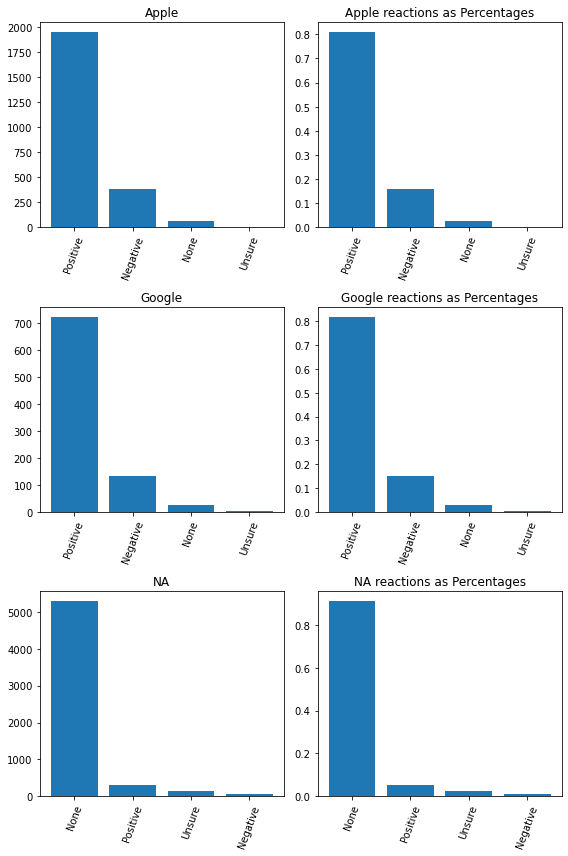

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8,12))

for n, item in enumerate(list(df['brand'].unique())):
    
    #product emotions
    item_df = df.loc[df['brand']== item]
    item_emotion = item_df['emotion'].value_counts()
    
    
    #plot graphs
    ax[n, 0].bar(item_emotion.index, item_emotion)
    ax[n, 0].set_title(item)
    ax[n, 0].tick_params(axis='x', labelrotation=70)
    
    #product emotions normalized
    item_emotion2 = item_df['emotion'].value_counts(normalize=True)
    
    ax[n, 1].bar(item_emotion2.index, item_emotion2)
    ax[n, 1].set_title(item +' reactions as Percentages')
    ax[n, 1].tick_params(axis='x', labelrotation=70)
    
    print(item)
    print(item_emotion2)

plt.tight_layout();

When comparing by brand. Apple has more tweets associated with their products/brands than google. They both have similar ratios of positive to negative to none emotion responses.

## Encode Categorical Data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   product  9093 non-null   object
 2   emotion  9093 non-null   object
 3   brand    9093 non-null   object
dtypes: object(4)
memory usage: 284.3+ KB


In [28]:
def create_category(column):
    df[column] = df[column].astype('category').cat.codes
    return df[column].value_counts()

In [29]:
create_category('emotion')

1    5389
2    2978
0     570
3     156
Name: emotion, dtype: int64

**Emotion Categorical Encoding Key:**

0. Negative, "Negative emotion" 
1. None, "No emotion toward brand or product"
2. Positive, "Positive emotion"
3. Unsure, "I can't tell"

In [30]:
create_category('brand')

2    5802
0    2409
1     882
Name: brand, dtype: int64

**Brand Categorical Encoding Key:**

0. Apple
1. Google
2. None

In [31]:
create_category('product')

4    5802
7     946
2     661
8     470
3     430
9     297
6     293
1      81
0      78
5      35
Name: product, dtype: int64

**Product Categorical Encoding Key**

4. NA                                 (5802)
7. iPad                               (946) 
2. Apple                               (661)
8. iPad or iPhone App                  (470)
3. Google                              (430)
9. iPhone                              (297)
6. Other Google product or service     (293)
1. Android App                          (81)
0. Android                              (78)
5. Other Apple product or service       (35)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   tweet    9092 non-null   object
 1   product  9093 non-null   int8  
 2   emotion  9093 non-null   int8  
 3   brand    9093 non-null   int8  
dtypes: int8(3), object(1)
memory usage: 97.8+ KB


In [33]:
df.head()

,tweet,product,emotion,brand
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,9,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,8,2,0
2,@swonderlin Can not wait for #iPad 2 also. The...,7,2,0
3,@sxsw I hope this year's festival isn't as cra...,8,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,3,2,1


## Text Cleaning

In [39]:
text_df = df.copy()

In [40]:
line = text_df['tweet'][0]
line

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [41]:
line = line.split(" ")


In [42]:
line = [x.lower() for x in line]

In [43]:
line

['.@wesley83',
 'i',
 'have',
 'a',
 '3g',
 'iphone.',
 'after',
 '3',
 'hrs',
 'tweeting',
 'at',
 '#rise_austin,',
 'it',
 'was',
 'dead!',
 '',
 'i',
 'need',
 'to',
 'upgrade.',
 'plugin',
 'stations',
 'at',
 '#sxsw.']